<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0.5, 1.0, "Median value of owner-occupied homes in $1000's")

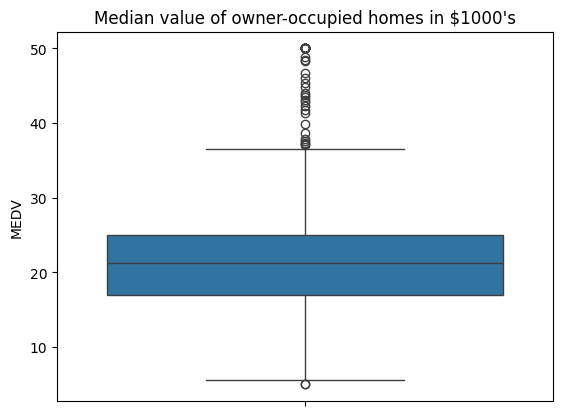

In [6]:
ax = sns.boxplot(boston_df['MEDV'])
ax.set_title("Median value of owner-occupied homes in $1000's")


The median cost of house is slightly over 20000$. There are notably many outliers above the max range. IQR seems relatively narrow.

<ipython-input-11-6ec8926365b9>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Tract does not bound river", "Tract bounds river"])


Text(0.5, 1.0, 'Bar plot for the Charles river variable')

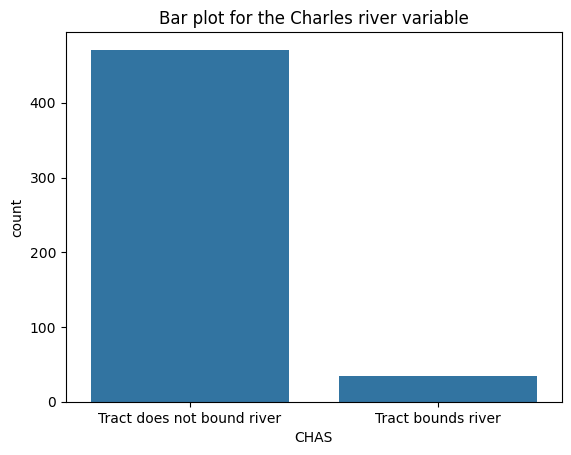

In [11]:
ax = sns.countplot(x='CHAS', data=boston_df)
ax.set_xticklabels(["Tract does not bound river", "Tract bounds river"])
ax.set_title("Bar plot for the Charles river variable")

Most houses are not located on river.

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0.5, 1.0, 'MEDV variable vs discretized AGE variable')

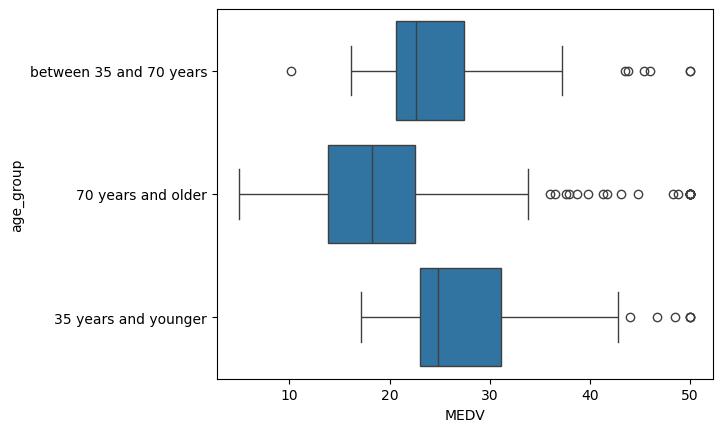

In [8]:
sns.boxplot(x='MEDV', y='age_group', data=boston_df)
ax.set_title("MEDV variable vs discretized AGE variable")

Each age group has outliers in the upper range, but the oldest houses are cheapest.

Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres')

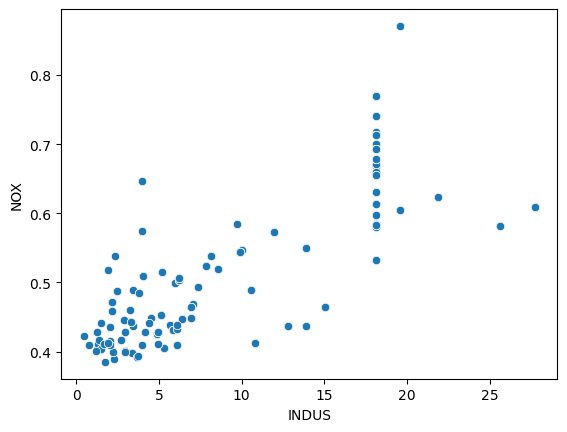

In [9]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title("Nitric oxide concentrations and the proportion of non-retail business acres")

Nitric oxide concentrations increase with non-retail business acres per town.

H0: The location by the river has no effect on the median value.
H1: The location by the river has an effect on the median value.

In [10]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

We can't assume equality of variance given the low p-value.

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference between median value of owner-occupied homes and location near riverside.

H0: No difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 
H1: Difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940. 

In [13]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

The variance is equal given the p-value.

In [14]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'], boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], boston_df[boston_df['age_group'] == '70 years and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


There is a difference between proportion of owner occupied units built prior to 1940 and median values of houses.

H0: No relationship between Nitric oxide concentrations and proportion of non-retail business acres per town H1: Significant difference between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [15]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [17]:
X = boston_df['DIS']
X = sm.add_constant(X) 
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        21:35:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When DIS = 0, the expected value of MEDV is 18.3901. For each unit increase of DIS, the expected increase in MEDV is 1.0916 units. The farther the home is from employment center, the more expensive it is. The model explains only 6.2% of variance.